# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

2024-08-03 14:11:18.710860: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Image dimensions: (32, 32, 3)
Number of classes: 100


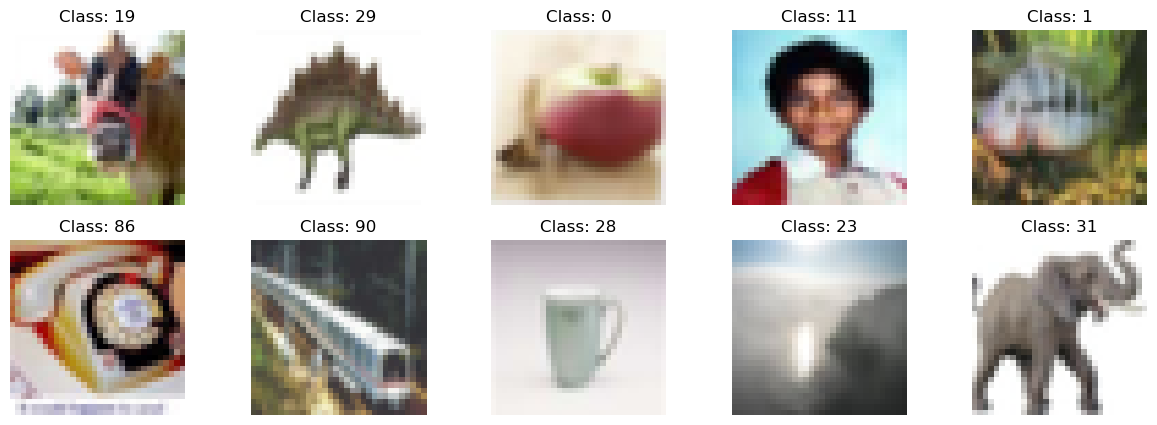

In [2]:
# Examine the shape of the training and test sets
print(f'X_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Dimensions of the images
image_shape = x_train.shape[1:]
print(f"Image dimensions: {image_shape}")

# The number of classes. 
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

# Examples from the training set.
def show_examples(x, y, num_examples=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_examples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i])
        plt.title(f"Class: {y[i][0]}")
        plt.axis('off')
    plt.show()

# Show 10 examples from the training set
show_examples(x_train, y_train,10)

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [3]:

# Normalize the images so they all have pixel values [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the labels to one-hot encoded vectors.
print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
print(f'After one-hot encoding: {y_train[0]}')

# Split the training set into training and validation sets.
# Use 80% of the training set for training and the remaining 20% for validation.

x_train, x_validation, y_train, y_validation = train_test_split(
    x_train,
    y_train,
    test_size=0.2, # 20% of the data is used for validation
    random_state=42 # Providing a value here means getting the same "random" split every time
)
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_validation shape: {x_validation.shape}')
print(f'y_validation shape: {y_validation.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

Before one-hot encoding: [19]
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
x_train shape: (40000, 32, 32, 3)
y_train shape: (40000, 100)
x_validation shape: (10000, 32, 32, 3)
y_validation shape: (10000, 100)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Input layer
# 32 neurons, ReLU activation
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Hidden layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')) # 64 neurons, ReLU activation
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Connected layers
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.5))  # Add dropout for regularization
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(rate=0.5))  # Add dropout for regularization

# Output layer
model.add(Dense(units=num_classes, activation='softmax'))

#Model summary
model.summary()

/Users/raghvendramishra/anaconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,299,364 (4.96 MB)

 Trainable params: 1,299,364 (4.96 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).

- <b>Loss function:</b> I use categorical cross-entropy as our loss function because it works well for classifying images into 100 categories.

- <b>Optimizer:</b> I am using Adam optimizer because the Adam optimizer is ideal for image classification tasks due to its adaptive learning rates, computational efficiency, fast convergence, robustness to hyperparameter selection, and ability to handle sparse gradients, making it a powerful tool for training deep learning models on complex and large-scale datasets.

In [5]:
from keras import optimizers

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.

- I started with 15 epochs, a reasonable number to see if the model starts to overfit or if the validation accuracy continues to improve. 

- Use a batch size of 32.
- Use the validation set for validation.

In [6]:
epochs = 15
batch_size = 32

# Train the model
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_validation, y_validation))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 51ms/step - accuracy: 0.0259 - loss: 4.4404 - val_accuracy: 0.0977 - val_loss: 3.8745
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.0925 - loss: 3.8709 - val_accuracy: 0.1626 - val_loss: 3.5175
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - accuracy: 0.1489 - loss: 3.5381 - val_accuracy: 0.2155 - val_loss: 3.2112
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 53ms/step - accuracy: 0.1973 - loss: 3.2822 - val_accuracy: 0.2564 - val_loss: 2.9989
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 67s 54ms/step - accuracy: 0.2326 - loss: 3.0953 - val_accuracy: 0.2903 - val_loss: 2.8373
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 73s 58ms/step - accuracy: 0.2619 - loss: 2.9425 - val_accuracy: 0.3086 - val_loss: 2.7563
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 70s 56ms/step - accuracy: 0.2883 - loss: 2.7914 - val_accuracy: 0.3220 - val_loss: 2.6814
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 54ms/step - accuracy: 0.3069 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 0.37470000982284546
- <b>Other metric:</b> precision, recall, F1 score.
- <b>Reason for selection:</b> The F1-score is chosen because it balances precision and recall, making it particularly useful for imbalanced datasets.
- <b>Value of metric:</b> 
    - Precision: 0.37485745668234954
    - Recall: 0.3747
    - F1-score: 0.3622689730135554

- <b>Interpretation of metric value:</b> The metrics indicate that the model has moderate performance, with relatively low precision and recall, and thus a low F1-score. This suggests that the model may be struggling with correctly identifying positive instances and may need further tuning or more data to improve its performance, especially for imbalanced datasets.

In [7]:
from sklearn.metrics import classification_report

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

# Predict the labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate a classification report
report = classification_report(y_true, y_pred_classes, output_dict=True)
print(classification_report(y_true, y_pred_classes))

# Extract the precision, recall, F1-score for the overall performance
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']


print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1_score}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3730 - loss: 2.5132
Test loss: 2.4928348064422607
Test accuracy: 0.37470000982284546
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
              precision    recall  f1-score   support

           0       0.50      0.74      0.60       100
           1       0.45      0.42      0.43       100
           2       0.23      0.39      0.29       100
           3       0.21      0.28      0.24       100
           4       0.20      0.11      0.14       100
           5       0.27      0.41      0.32       100
           6       0.35      0.41      0.38       100
           7       0.46      0.29      0.36       100
           8       0.38      0.42      0.40       100
           9       0.59      0.42      0.49       100
          10       0.33      0.07      0.12       100
          11       0.30      0.06      0.10       100
          12       0.42      0.33      0.37       100
          13       0.38      0.40      0.39       100
      

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

- The plots display the model's accuracy on the training and validation sets over the epochs. A significantly lower validation accuracy compared to the training accuracy may indicate overfitting, whereas improving and converging accuracies suggest good generalization.

- For the correctly classified image, the model accurately identifies the image, with the predicted probabilities displaying a high value for the correct class, reflecting the model's confidence.

- For the incorrectly classified image, the model misidentifies the image. The predicted probabilities might be spread across different classes, indicating uncertainty, or show high confidence in an incorrect class, highlighting a model error.


- The classification probabilities indicate the model's confidence in its predictions.

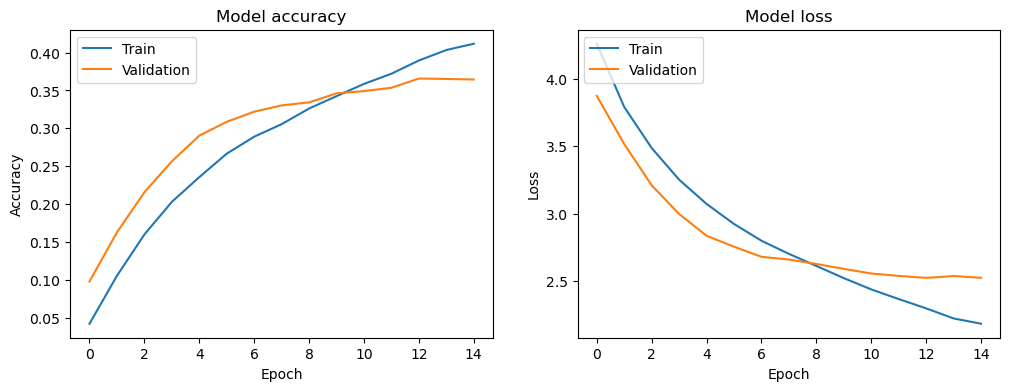

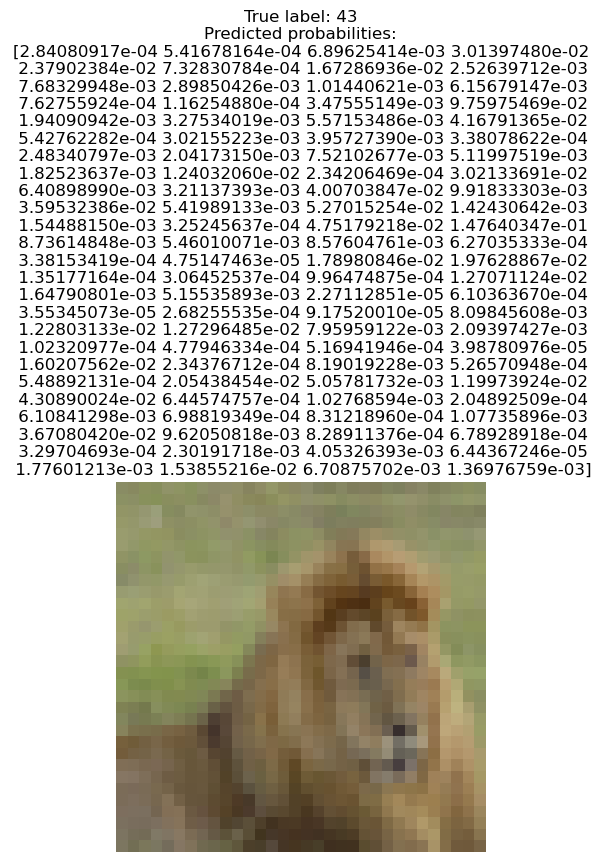

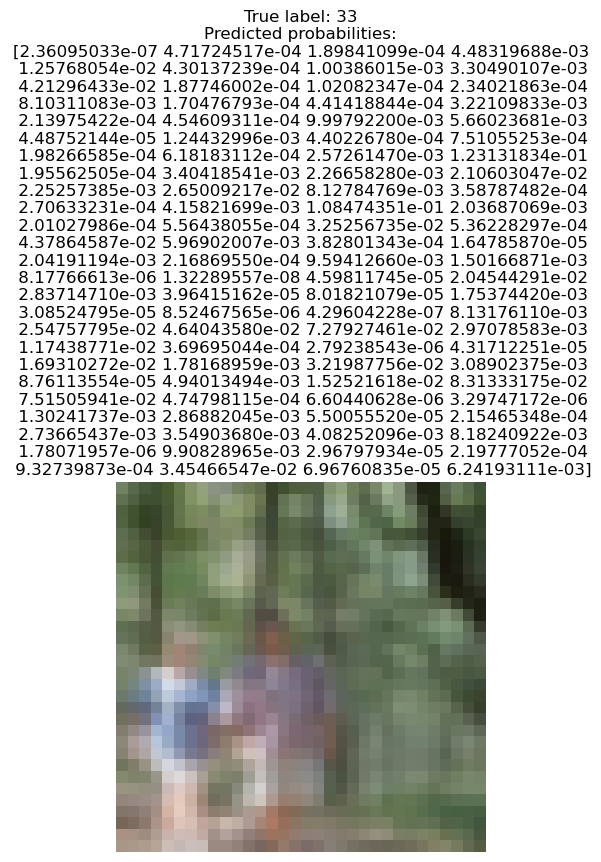

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Select an image correctly classified by the model
correct_indices = np.where(y_pred_classes == y_true)[0]
incorrect_indices = np.where(y_pred_classes != y_true)[0]

# Plot a correctly classified image
correct_index = correct_indices[3]
correct_image = x_test[correct_index]
correct_true_label = y_true[correct_index]
correct_predicted_probs = y_pred[correct_index]

plt.imshow(correct_image)
plt.title(f"True label: {correct_true_label}\nPredicted probabilities:\n{correct_predicted_probs}")
plt.axis('off')
plt.show()

# Plot an incorrectly classified image
incorrect_index = incorrect_indices[1]
incorrect_image = x_test[incorrect_index]
incorrect_true_label = y_true[incorrect_index]
incorrect_predicted_probs = y_pred[incorrect_index]

plt.imshow(incorrect_image)
plt.title(f"True label: {incorrect_true_label}\nPredicted probabilities:\n{incorrect_predicted_probs}")
plt.axis('off')
plt.show()

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

Data Preprocessing with augmentation



In [9]:
from keras.callbacks import EarlyStopping

# Data augmentation using Keras ImageDataGenerator
from keras.src.legacy.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with data augmentation
history_aug = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=50,
    validation_data=(x_validation, y_validation),
    callbacks=[early_stopping]
)

# Evaluate the model
test_aug_loss, test_aug_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'Test augmented accuracy: {test_aug_accuracy:.4f}')
print(f'Test augmented loss: {test_aug_loss:.4f}')

# Predict the labels for the test set
y_pred_aug = model.predict(x_test)
y_pred_classes_aug = np.argmax(y_pred_aug, axis=1)
y_true_aug = np.argmax(y_test, axis=1)

# Generate a classification report
report = classification_report(y_true_aug, y_pred_classes_aug, output_dict=True)
print(classification_report(y_true_aug, y_pred_classes_aug))

# Extract the precision, recall, F1-score for the overall performance
precision_aug = report['weighted avg']['precision']
recall_aug = report['weighted avg']['recall']
f1_score_aug = report['weighted avg']['f1-score']


print(f"Precision: {precision_aug}")
print(f"Recall: {recall_aug}")
print(f"F1-score: {f1_score_aug}")



Epoch 1/50
   1/1250 ━━━━━━━━━━━━━━━━━━━━ 22:57 1s/step - accuracy: 0.1875 - loss: 3.2489

/Users/raghvendramishra/anaconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 64s 50ms/step - accuracy: 0.1773 - loss: 3.5488 - val_accuracy: 0.2983 - val_loss: 2.8550
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 64s 51ms/step - accuracy: 0.1884 - loss: 3.3995 - val_accuracy: 0.3016 - val_loss: 2.8092
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 65s 52ms/step - accuracy: 0.1927 - loss: 3.3519 - val_accuracy: 0.3090 - val_loss: 2.7720
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 54ms/step - accuracy: 0.2002 - loss: 3.3085 - val_accuracy: 0.3128 - val_loss: 2.7559
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 54ms/step - accuracy: 0.2046 - loss: 3.3074 - val_accuracy: 0.3068 - val_loss: 2.7620
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 54ms/step - accuracy: 0.2060 - loss: 3.2491 - val_accuracy: 0.2963 - val_loss: 2.8167
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 55ms/step - accuracy: 0.2113 - loss: 3.2590 - val_accuracy: 0.3098 - val_loss: 2.7613
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 68s 54ms/step - accuracy: 0.2137 - loss: 3.22

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

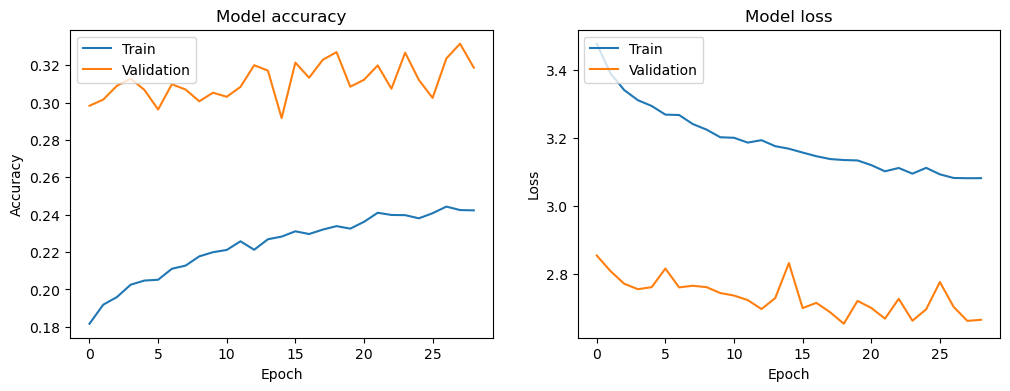

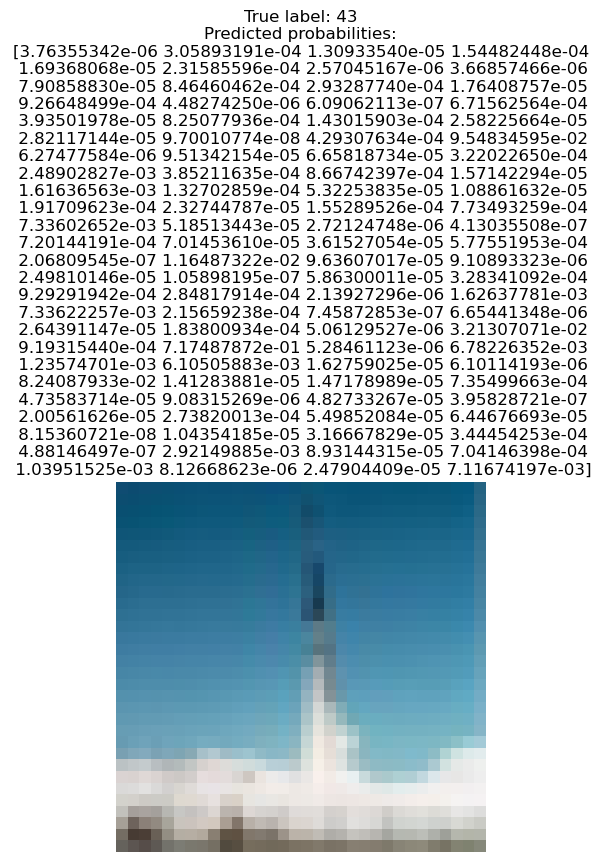

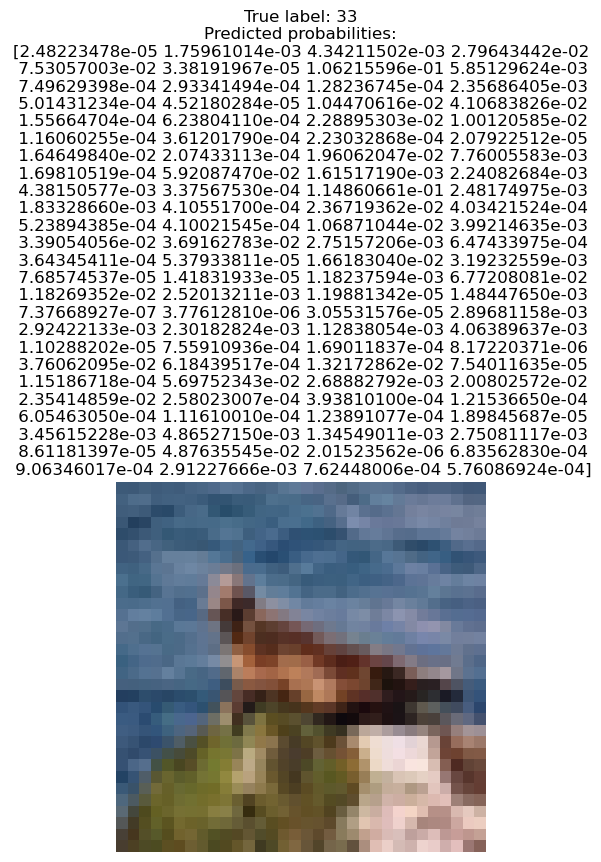

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history_aug.history['accuracy'])
plt.plot(history_aug.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_aug.history['loss'])
plt.plot(history_aug.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Select an image correctly classified by the model
correct_indices_aug = np.where(y_pred_classes_aug == y_true_aug)[0]
incorrect_indices_aug = np.where(y_pred_classes_aug != y_true_aug)[0]

# Plot a correctly classified image
correct_index_aug = correct_indices_aug[3]
correct_image_aug = x_test[correct_index_aug]
correct_true_label_aug = y_true_aug[correct_index_aug]
correct_predicted_probs_aug = y_pred_aug[correct_index_aug]

plt.imshow(correct_image_aug)
plt.title(f"True label: {correct_true_label}\nPredicted probabilities:\n{correct_predicted_probs_aug}")
plt.axis('off')
plt.show()

# Plot an incorrectly classified image
incorrect_index_aug = incorrect_indices_aug[1]
incorrect_image_aug = x_test[incorrect_index_aug]
incorrect_true_label_aug = y_true[incorrect_index_aug]
incorrect_predicted_probs_aug = y_pred[incorrect_index_aug]

plt.imshow(incorrect_image_aug)
plt.title(f"True label: {incorrect_true_label}\nPredicted probabilities:\n{incorrect_predicted_probs_aug}")
plt.axis('off')
plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

- The model's performance did not improve with data augmentation. 
   - Accuracy: The test accuracy decreased from 0.3747 to 0.3384.
   - Precision: Precision dropped from 0.3749 to 0.3445.
   - Recall: Recall decreased from 0.3747 to 0.3384.
   - F1-score: The F1-score also declined from 0.3623 to 0.3141.

- The decrease in performance after applying data augmentation can be attributed to several potential reasons like the chosen augmentation parameters might have been too aggressive, introducing variations that are too challenging for the model to learn from. For example, excessive rotation, shifting, or zooming could result in images that no longer resemble the original data distribution.Furthermore, despite using augmentation to reduce overfitting, the model might still be overfitting to the noise introduced by augmentation rather than learning useful patterns. This could happen if the model is memorizing the augmented images rather than generalizing.

- Yes, there is room for further improvement. Here are few reasons of why and potential areas for improvement:
    - Fine-Tuning Augmentation Parameters - The current augmentation settings might not be optimal.
    - Regularization Techniques- Reason: To prevent overfitting and improve generalization.

- Further Techniques:
    - Learning Rate Scheduling: Dynamically adjust the learning rate during training.
    - Regularization: Techniques like L2 regularization to prevent overfitting.
    - Ensemble Methods: Combine predictions from multiple models to improve accuracy.
    - Transfer Learning: Use a pre-trained model and fine-tune it for your specific task.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.